--- Importing the modules ---

In [1]:
import pandas as pd
import numpy as np
import timeit
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt

--- Initialize Selenium WebDriver and Automate the task---

In [2]:
driver = webdriver.Chrome()
driver.get("https://www.barchart.com/futures")

time.sleep(5)  # Allow time for the page to load


# Heading ---
title = driver.find_element(By.CLASS_NAME, "title-wrapper").text
print("Heading:", title)

# Locate the table element
element = driver.find_element(By.CLASS_NAME, "block-content")
text_data = element.find_element(By.TAG_NAME, "div").text


driver.quit()

Heading: Futures Market Overview


In [3]:
text_data

"Contract Name\nLast\nChange\nHigh\nLow\nVolume\nTime\nLinks\nS&P 500 E-Mini (Dec '24)\n6,011.75\n-4.25\n6,025.25\n6,004.00\n155,852\n07:46 CT\nNasdaq 100 E-Mini (Dec '24)\n21,133.75\n-25.75\n21,190.25\n21,090.25\n79,976\n07:46 CT\nDow Futures Mini (Dec '24)\n44,169\n+61\n44,261\n44,029\n23,663\n07:46 CT\nS&P 500 VIX (Dec '24)\n15.4100\n-0.0498\n15.6000\n15.3500\n3,865\n07:46 CT\nU.S. Dollar Index (Dec '24)\n106.810\n+0.431\n106.990\n106.410\n11,137\n07:46 CT\n10-Year T-Note (Dec '24)\n109-060\n-0-075\n109-165\n109-040\n769,255\n07:46 CT\nCrude Oil WTI (Dec '24)\n69.12\n+0.69\n69.29\n67.92\n61,204\n07:46 CT\nNatural Gas (Jan '25)\n3.174\n-0.028\n3.201\n3.156\n13,585\n07:46 CT\nGold (Dec '24)\n2,563.5\n-23.0\n2,585.8\n2,541.5\n140,994\n07:46 CT\nSilver (Dec '24)\n30.285\n-0.378\n30.515\n29.750\n41,454\n07:46 CT\nCorn (Dec '24)\n425-4\n-1-0\n428-0\n425-2\n30,236\n07:44 CT\nWheat (Dec '24)\n537-4\n-3-4\n544-2\n536-2\n10,404\n07:44 CT\nSoybean (Jan '25)\n1007-2\n-0-4\n1013-6\n1005-0\n21,70

--- Clean, Transform and Load the Data ---

In [4]:
# Step 1: Split text by lines and clean up any extra whitespace ---
cleaned_data = text_data.strip().splitlines()

lines = []
for line in cleaned_data:
    stripped_line = line.strip()  # Remove whitespace from each line
    if stripped_line:             # Only add non-empty lines
        lines.append(stripped_line)

In [5]:
lines

['Contract Name',
 'Last',
 'Change',
 'High',
 'Low',
 'Volume',
 'Time',
 'Links',
 "S&P 500 E-Mini (Dec '24)",
 '6,011.75',
 '-4.25',
 '6,025.25',
 '6,004.00',
 '155,852',
 '07:46 CT',
 "Nasdaq 100 E-Mini (Dec '24)",
 '21,133.75',
 '-25.75',
 '21,190.25',
 '21,090.25',
 '79,976',
 '07:46 CT',
 "Dow Futures Mini (Dec '24)",
 '44,169',
 '+61',
 '44,261',
 '44,029',
 '23,663',
 '07:46 CT',
 "S&P 500 VIX (Dec '24)",
 '15.4100',
 '-0.0498',
 '15.6000',
 '15.3500',
 '3,865',
 '07:46 CT',
 "U.S. Dollar Index (Dec '24)",
 '106.810',
 '+0.431',
 '106.990',
 '106.410',
 '11,137',
 '07:46 CT',
 "10-Year T-Note (Dec '24)",
 '109-060',
 '-0-075',
 '109-165',
 '109-040',
 '769,255',
 '07:46 CT',
 "Crude Oil WTI (Dec '24)",
 '69.12',
 '+0.69',
 '69.29',
 '67.92',
 '61,204',
 '07:46 CT',
 "Natural Gas (Jan '25)",
 '3.174',
 '-0.028',
 '3.201',
 '3.156',
 '13,585',
 '07:46 CT',
 "Gold (Dec '24)",
 '2,563.5',
 '-23.0',
 '2,585.8',
 '2,541.5',
 '140,994',
 '07:46 CT',
 "Silver (Dec '24)",
 '30.285',
 

In [6]:
# Step 2: Extract headers ---
headers = lines[:7]

In [7]:
# Step 3: Process remaining lines to group them in rows ---
data_rows = []
for i in range(8, len(lines), 7):
    data_rows.append(lines[i:i + 7])

In [34]:
# Step 4: Create a DataFrame ---
df = pd.DataFrame(data_rows, columns=headers)

### Final Output - the DataFrame 

In [35]:
df

,Contract Name,Last,Change,High,Low,Volume,Time
0,S&P 500 E-Mini (Dec '24),"6,011.75",-4.25,"6,025.25","6,004.00","155,852",07:46 CT
1,Nasdaq 100 E-Mini (Dec '24),"21,133.75",-25.75,"21,190.25","21,090.25","79,976",07:46 CT
2,Dow Futures Mini (Dec '24),"44,169",+61,"44,261","44,029","23,663",07:46 CT
3,S&P 500 VIX (Dec '24),15.4100,-0.0498,15.6000,15.3500,"3,865",07:46 CT
4,U.S. Dollar Index (Dec '24),106.810,+0.431,106.990,106.410,"11,137",07:46 CT
5,10-Year T-Note (Dec '24),109-060,-0-075,109-165,109-040,"769,255",07:46 CT
6,Crude Oil WTI (Dec '24),69.12,+0.69,69.29,67.92,"61,204",07:46 CT
7,Natural Gas (Jan '25),3.174,-0.028,3.201,3.156,"13,585",07:46 CT
8,Gold (Dec '24),"2,563.5",-23.0,"2,585.8","2,541.5","140,994",07:46 CT
9,Silver (Dec '24),30.285,-0.378,30.515,29.750,"41,454",07:46 CT


--- Analysed the Data ---

In [39]:
# Clean data
df["Last"] = pd.to_numeric(df["Last"], errors="coerce")
df["Change"] = pd.to_numeric(df["Change"], errors="coerce")
df["High"] = pd.to_numeric(df["High"], errors="coerce")
df["Low"] = pd.to_numeric(df["Low"], errors="coerce")


In [40]:
# Calculate the Mean of High and Low
df["Mean"] = (df["High"] + df["Low"]) / 2

In [41]:
# Find the row with the largest "Change"
max_change_row = df.loc[df["Change"].idxmax()]
max_change_row


Contract Name    Cocoa (Mar '25)
Last                         NaN
Change                     419.0
High                         NaN
Low                          NaN
Volume                     5,882
Time                    07:46 CT
Mean                         NaN
Name: 15, dtype: object

In [42]:
contract_name = max_change_row["Contract Name"]
last_price = max_change_row["Last"]
print(f"Largest Change Contract: {contract_name}, Last Price: {last_price}")

Largest Change Contract: Cocoa (Mar '25), Last Price: nan


Line Plot for High, Low, and Mean Prices

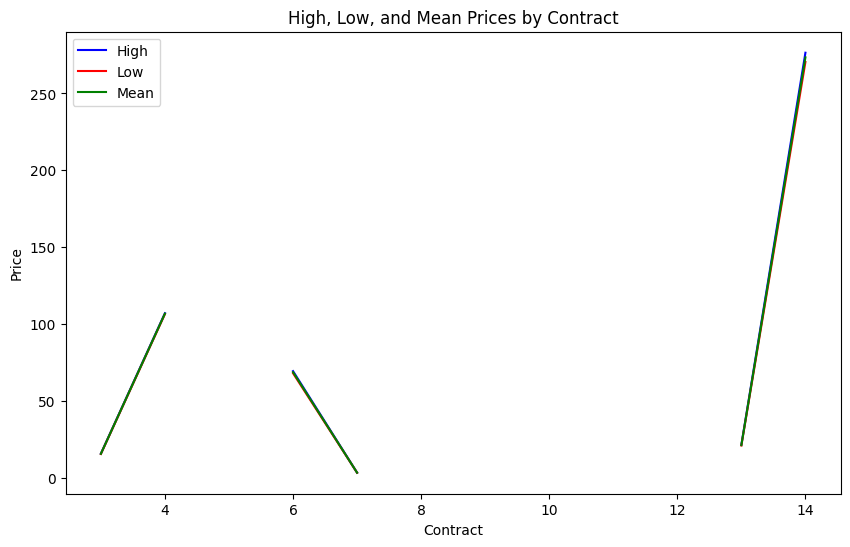

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['High'], label='High', color='blue')
plt.plot(df.index, df['Low'], label='Low', color='red')
plt.plot(df.index, df['Mean'], label='Mean', color='green')
plt.xlabel("Contract")
plt.ylabel("Price")
plt.legend()
plt.title("High, Low, and Mean Prices by Contract")
plt.show()

